In [2]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil


from google.colab import files
uploaded = files.upload()

import zipfile
with zipfile.ZipFile('german_traffic.zip', 'r') as zip_ref:
    zip_ref.extractall('data')  # Extract to 'data' directory

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)


# Display dataset statistics
num_classes = len(np.unique(labels))
print(f"Number of classes: {num_classes}")

# Plot distribution of images per class
class_counts = np.bincount(labels)
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), class_counts, tick_label=range(num_classes))
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels,
                                                  test_size=0.3, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Display shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_val, y_train, y_val are defined from previous preprocessing steps

# Display sample images from each class in the training set
num_classes = y_train.shape[1]  # Get number of classes from one-hot encoded labels
class_ids = np.arange(num_classes)  # Array of class IDs

# Determine the layout of subplots based on the number of classes
num_rows = (num_classes - 1) // 5 + 1  # Calculate number of rows needed
num_cols = min(num_classes, 5)  # Maximum of 5 columns

plt.figure(figsize=(num_cols * 3, num_rows * 3))  # Adjust figure size based on layout

# Loop through each class ID
for i, class_id in enumerate(class_ids):
    # Find indices of samples corresponding to the current class
    sample_indices = np.where(y_train[:, class_id] == 1)[0]

    # Select the first sample index (if available) for visualization
    if len(sample_indices) > 0:
        sample_image_index = sample_indices[0]  # Select the first sample index
        sample_image = X_train[sample_image_index]

        # Determine subplot position dynamically based on layout
        subplot_index = i + 1  # Subplot index starts from 1
        plt.subplot(num_rows, num_cols, subplot_index)
        plt.imshow(sample_image)
        plt.title(f"Class {class_id}")
        plt.axis('off')

plt.tight_layout()
plt.show()

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras

# Build the CNN model
model = keras.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming X_test and labels are defined
X_test = np.array(data)
X_test = X_test / 255  # Normalize the test data if needed

pred_probabilities = model.predict(X_test)
pred_classes = np.argmax(pred_probabilities, axis=-1)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred_classes) * 100)

# Access the weights of the first convolutional layer
first_conv_layer_weights = model.layers[0].get_weights()[0]

# Visualize filters of the first convolutional layer
plt.figure(figsize=(10, 5))
for i in range(first_conv_layer_weights.shape[-1]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_conv_layer_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters of the First Convolutional Layer')
plt.show()

# Save the trained model
model.save('traffic_sign_classifier.h5')

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, HTML
import ipywidgets as widgets
from io import BytesIO
from PIL import Image

def preprocess_image(img):
    try:
        # Convert uploaded image to numpy array (RGB format)
        img = np.array(img)

        # Resize the image to match the input size expected by the model
        img_resized = cv2.resize(img, (30, 30))

        # Normalize pixel values to [0, 1]
        img_normalized = img_resized.astype('float32') / 255.0

        return img_normalized

    except Exception as e:
        print("Error during image preprocessing:", str(e))
        return None

def recognize_traffic_sign(img, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(img)

    # Check if preprocessing was successful
    if preprocessed_image is None:
        return None

    try:
        # Expand dimensions to match model input shape (assuming model expects batches)
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

        # Perform inference using the model
        pred_probabilities = model.predict(preprocessed_image)

        # Get predicted class index
        pred_class_index = np.argmax(pred_probabilities, axis=-1)

        return pred_class_index

    except Exception as e:
        print("Error during prediction:", str(e))
        return None

# Load your trained model
model_path = '/content/traffic_sign_classifier.h5'
model = load_model(model_path)

# Create file upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_file_upload(change):
    uploaded_filename = next(iter(upload_widget.value))
    content = upload_widget.value[uploaded_filename]['content']

    # Open the uploaded image using PIL
    img = Image.open(BytesIO(content))

    # Display the uploaded image
    display(img.resize((200, 200)))  # Resize for display

    # Recognize traffic sign from the uploaded image
    predicted_class = recognize_traffic_sign(img, model)

    if predicted_class is not None:
        print(f"Predicted traffic sign class index: {predicted_class}")
    else:
        print("Traffic sign recognition failed.")

upload_widget.observe(on_file_upload, names='_counter')

display(upload_widget)

[==================================================] 641568792 bytes downloaded
Downloaded and uncompressed: gtsrb-german-traffic-sign
Data source import complete.


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths and constants
data_dir = '/kaggle/input/gtsrb-german-traffic-sign'
train_path = os.path.join(data_dir, 'Train')

# Define image dimensions and channels
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3  # Assuming RGB images

# Load and preprocess the dataset
image_data = []
image_labels = []

# Iterate through each class folder
for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    for img_file in os.listdir(class_path):
        try:
            # Read and resize image
            img_path = os.path.join(class_path, img_file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))

            # Append image data and label
            image_data.append(image)
            image_labels.append(int(class_folder))  # Use folder name as label

        except Exception as e:
            print(f"Error processing image {img_file}: {str(e)}")

# Convert lists to numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Display dataset statistics
num_classes = len(np.unique(image_labels))
print(f"Number of classes: {num_classes}")


Number of classes: 43


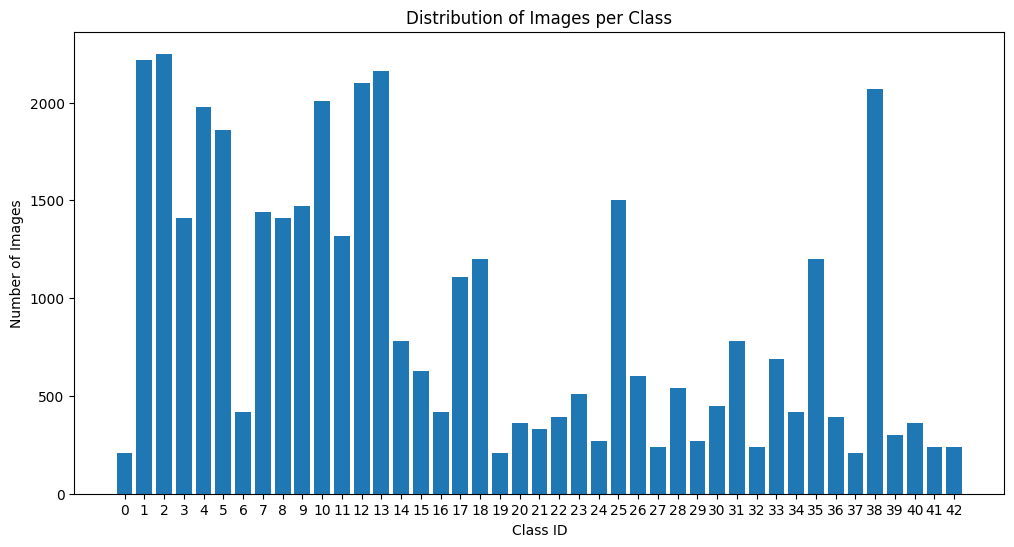

In [5]:
# Plot distribution of images per class
class_counts = np.bincount(image_labels)
plt.figure(figsize=(12, 6))
plt.bar(range(num_classes), class_counts, tick_label=range(num_classes))
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

In [7]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels,
                                                  test_size=0.3, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Display shapes of the training and validation sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (27446, 30, 30, 3)
X_val shape: (11763, 30, 30, 3)
y_train shape: (27446, 43)
y_val shape: (11763, 43)


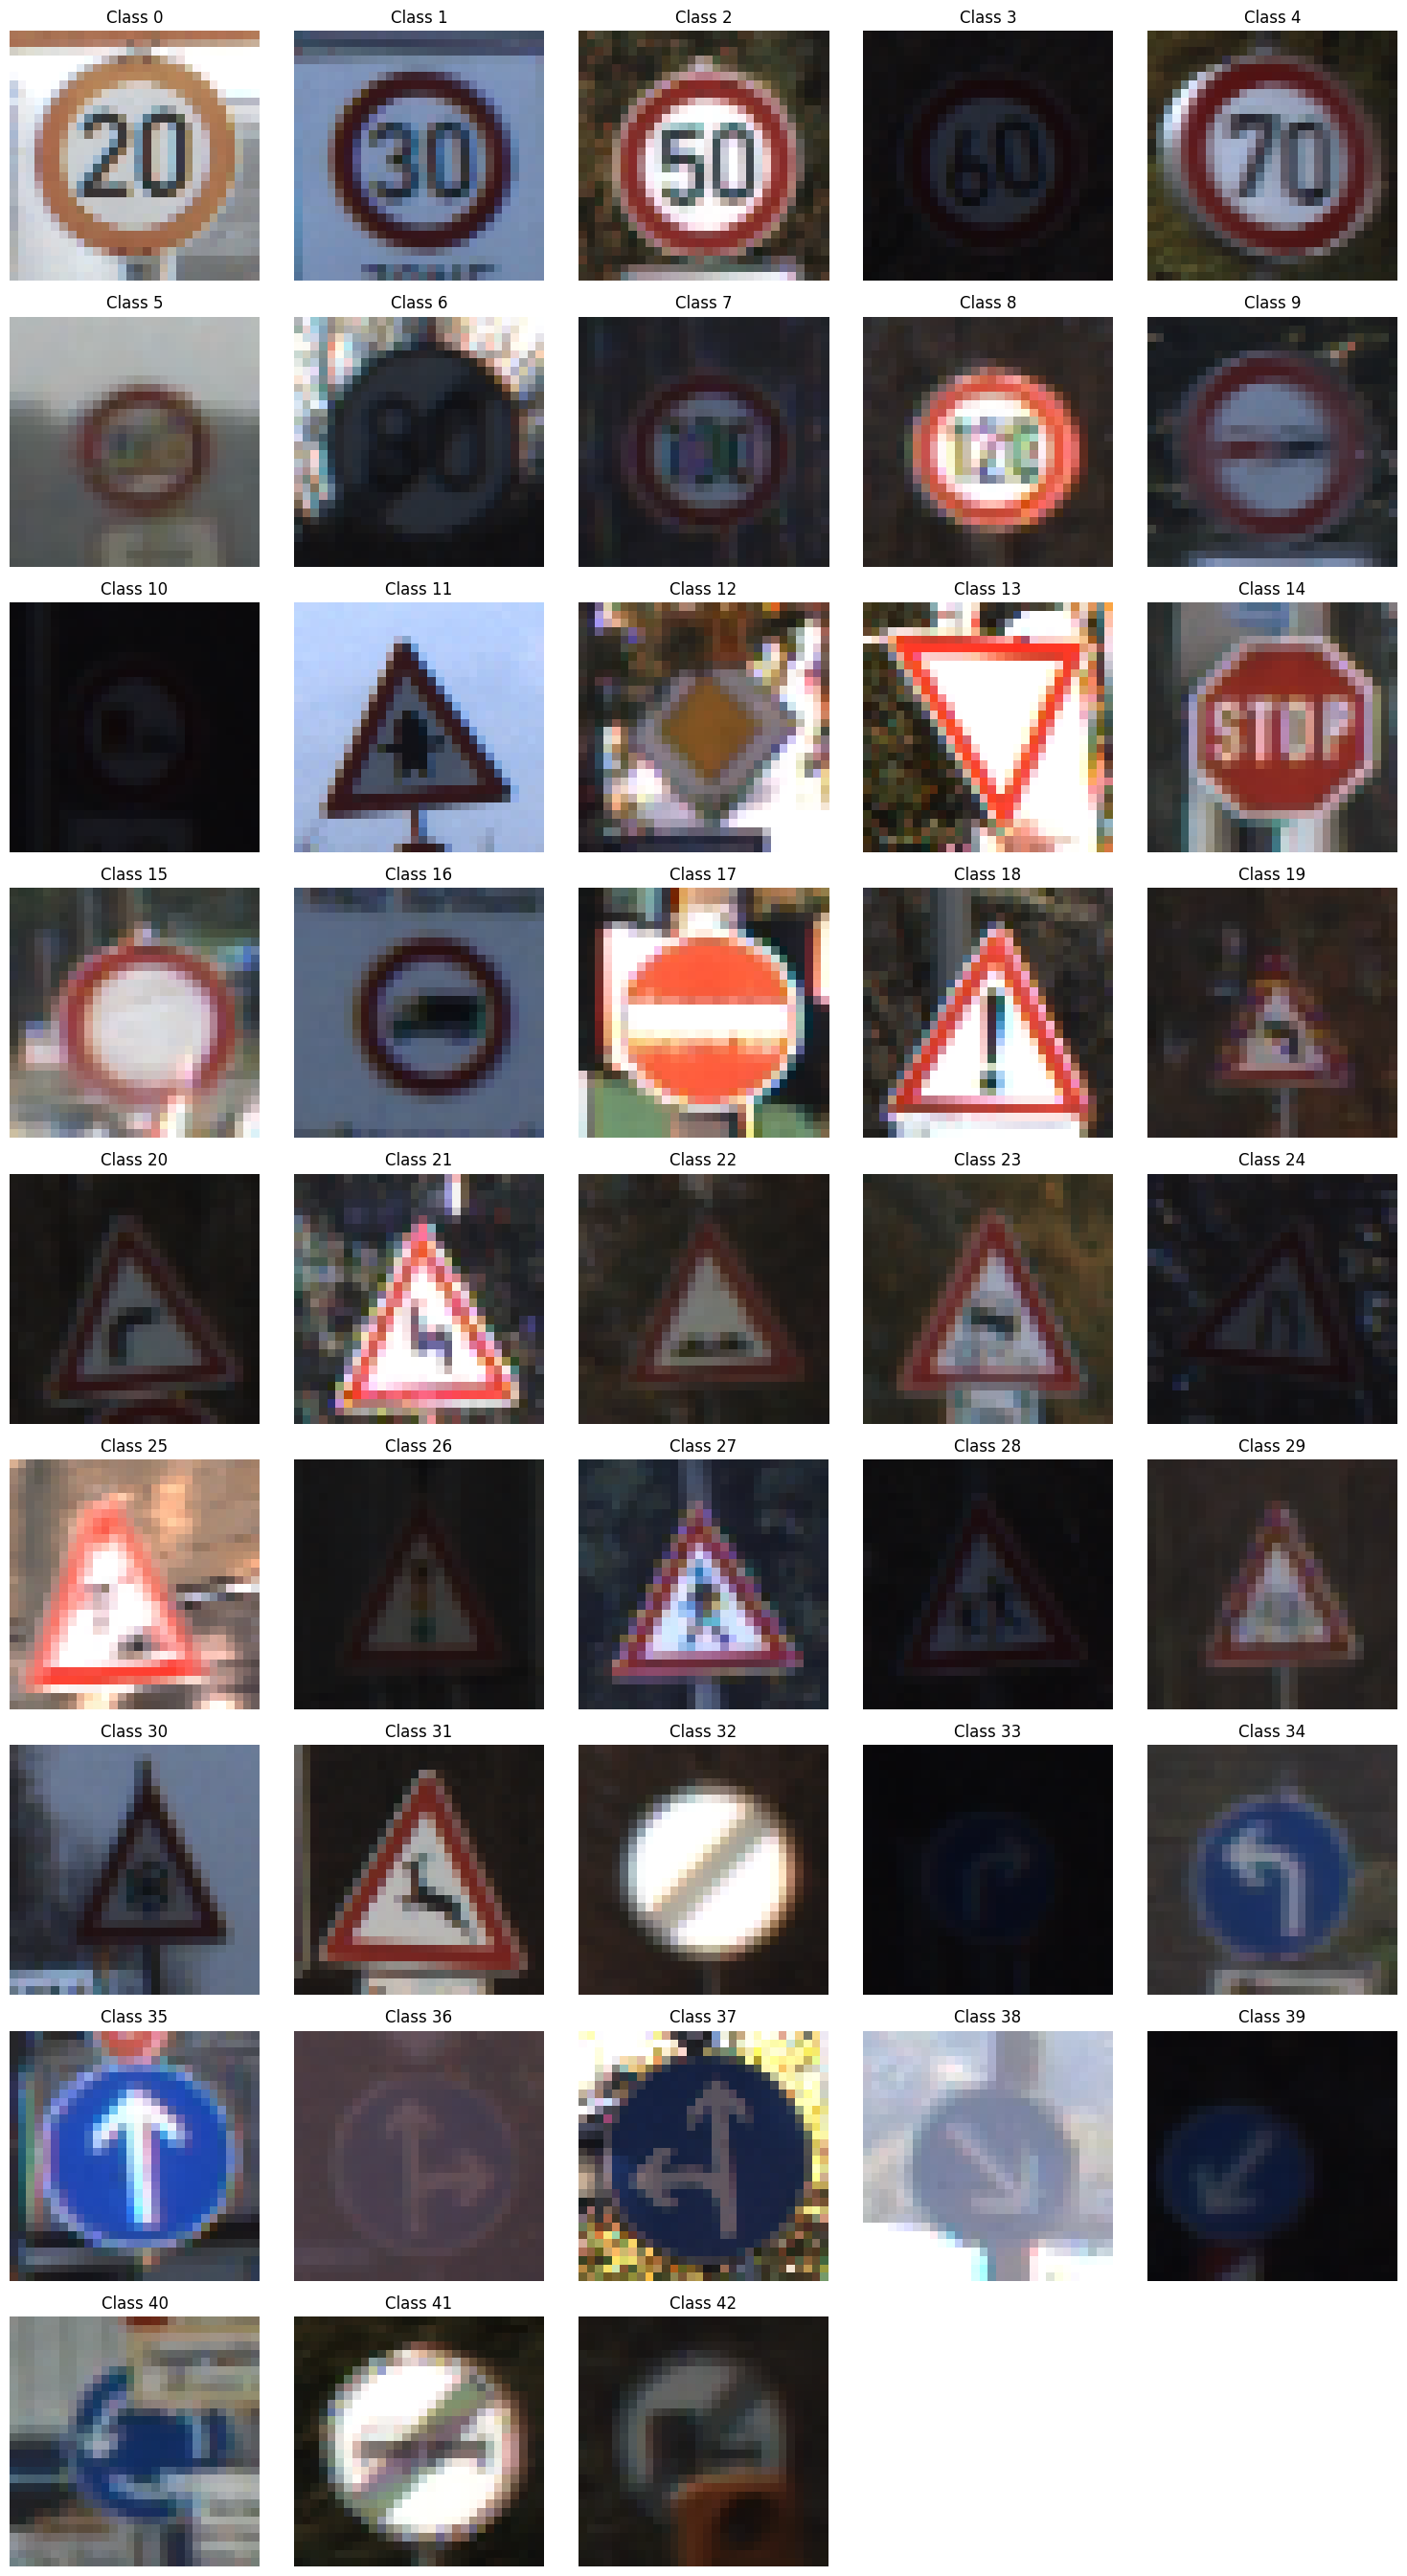

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming X_train, X_val, y_train, y_val are defined from previous preprocessing steps

# Display sample images from each class in the training set
num_classes = y_train.shape[1]  # Get number of classes from one-hot encoded labels
class_ids = np.arange(num_classes)  # Array of class IDs

# Determine the layout of subplots based on the number of classes
num_rows = (num_classes - 1) // 5 + 1  # Calculate number of rows needed
num_cols = min(num_classes, 5)  # Maximum of 5 columns

plt.figure(figsize=(num_cols * 3, num_rows * 3))  # Adjust figure size based on layout

# Loop through each class ID
for i, class_id in enumerate(class_ids):
    # Find indices of samples corresponding to the current class
    sample_indices = np.where(y_train[:, class_id] == 1)[0]

    # Select the first sample index (if available) for visualization
    if len(sample_indices) > 0:
        sample_image_index = sample_indices[0]  # Select the first sample index
        sample_image = X_train[sample_image_index]

        # Determine subplot position dynamically based on layout
        subplot_index = i + 1  # Subplot index starts from 1
        plt.subplot(num_rows, num_cols, subplot_index)
        plt.imshow(sample_image)
        plt.title(f"Class {class_id}")
        plt.axis('off')

plt.tight_layout()
plt.show()


In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras

# Build the CNN model
model = keras.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)


Epoch 1/10
858/858 [==============================] - 89s 101ms/step - loss: 0.4422 - accuracy: 0.8842 - val_loss: 0.0569 - val_accuracy: 0.9837
Epoch 2/10
858/858 [==============================] - 82s 96ms/step - loss: 0.0500 - accuracy: 0.9853 - val_loss: 0.0369 - val_accuracy: 0.9901
Epoch 3/10
858/858 [==============================] - 86s 100ms/step - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0380 - val_accuracy: 0.9875
Epoch 4/10
858/858 [==============================] - 82s 95ms/step - loss: 0.0326 - accuracy: 0.9902 - val_loss: 0.0528 - val_accuracy: 0.9844
Epoch 5/10
858/858 [==============================] - 85s 100ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0441 - val_accuracy: 0.9866
Epoch 6/10
858/858 [==============================] - 85s 99ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0361 - val_accuracy: 0.9884
Epoch 7/10
858/858 [==============================] - 82s 95ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0815 - val_accura

In [34]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming X_test and labels are defined
X_test = np.array(data)
X_test = X_test / 255  # Normalize the test data if needed

pred_probabilities = model.predict(X_test)
pred_classes = np.argmax(pred_probabilities, axis=-1)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred_classes) * 100)

395/395 [==============================] - 9s 23ms/step
Test Data accuracy:  84.58432304038006


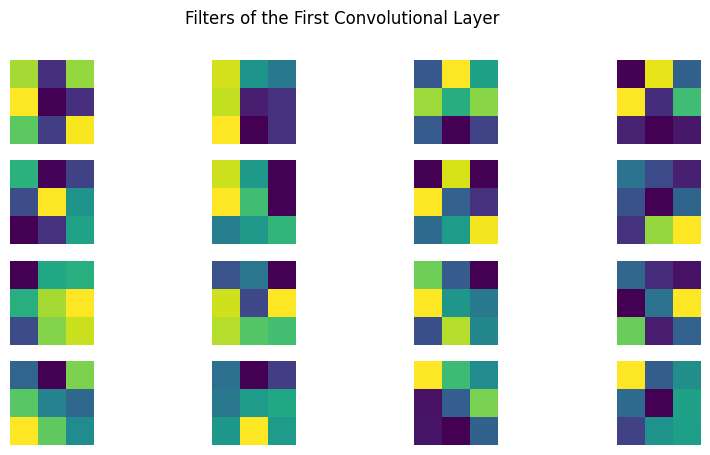

In [35]:
# Access the weights of the first convolutional layer
first_conv_layer_weights = model.layers[0].get_weights()[0]

# Visualize filters of the first convolutional layer
plt.figure(figsize=(10, 5))
for i in range(first_conv_layer_weights.shape[-1]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(first_conv_layer_weights[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Filters of the First Convolutional Layer')
plt.show()


In [36]:
# Save the trained model
model.save('traffic_sign_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileUpload(value={}, accept='image/*', description='Upload')

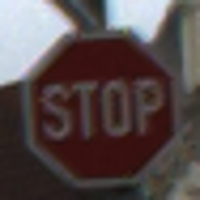

1/1 [==============================] - 0s 144ms/step
Predicted traffic sign class index: [14]


In [45]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from IPython.display import display, HTML
import ipywidgets as widgets
from io import BytesIO
from PIL import Image

def preprocess_image(img):
    try:
        # Convert uploaded image to numpy array (RGB format)
        img = np.array(img)

        # Resize the image to match the input size expected by the model
        img_resized = cv2.resize(img, (30, 30))

        # Normalize pixel values to [0, 1]
        img_normalized = img_resized.astype('float32') / 255.0

        return img_normalized

    except Exception as e:
        print("Error during image preprocessing:", str(e))
        return None

def recognize_traffic_sign(img, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(img)

    # Check if preprocessing was successful
    if preprocessed_image is None:
        return None

    try:
        # Expand dimensions to match model input shape (assuming model expects batches)
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

        # Perform inference using the model
        pred_probabilities = model.predict(preprocessed_image)

        # Get predicted class index
        pred_class_index = np.argmax(pred_probabilities, axis=-1)

        return pred_class_index

    except Exception as e:
        print("Error during prediction:", str(e))
        return None

# Load your trained model
model_path = '/content/traffic_sign_classifier.h5'
model = load_model(model_path)

# Create file upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)

def on_file_upload(change):
    uploaded_filename = next(iter(upload_widget.value))
    content = upload_widget.value[uploaded_filename]['content']

    # Open the uploaded image using PIL
    img = Image.open(BytesIO(content))

    # Display the uploaded image
    display(img.resize((200, 200)))  # Resize for display

    # Recognize traffic sign from the uploaded image
    predicted_class = recognize_traffic_sign(img, model)

    if predicted_class is not None:
        print(f"Predicted traffic sign class index: {predicted_class}")
    else:
        print("Traffic sign recognition failed.")

upload_widget.observe(on_file_upload, names='_counter')

display(upload_widget)
